# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Комосский Егор Артемович и Рыжиков Иван Сергеевич

## Основные теоретические положения

### Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом N:

$x_{k+N} = x_k \; \forall k$

Рассмотрим фрагмент последовательности ${x_k}$ от 0 до $N-1$, составляющий N отсчётов.

Тогда дискретным преобразованием Фурье (ДПФ) будем называть выражение

$ X(n) = \displaystyle \sum_{k=0}^{N - 1} x_k e^{-i \frac{2 \pi n}{N}k}$ при $n = 0...N-1$

Спектром дискретного сигнала будем называть

$S(\omega) = \displaystyle \sum_{k=- \infty}^{\infty} x_k e^{-i \omega k}$

Формула связи ДПФ и спектра дискретного сигнала (вычисление дискретных отсчётов спектра дисктретного сигнала с помощью ДПФ)

$X(n) = S(\frac{2 \pi n}{N}) = S(w_d \frac{n}{N}), \: T = 1$


### Полиномиальное сглаживание

Для заданного дискретного сигнала $x_n$ последовательность, описывающая выходной сигнал нерекурсивного фильтра, в общем случае выглядит следующим образом:

$y_n = \sum_{k=0}^M c_k x_{n-k}$

где M - размер окна в котором производится фильтрация.


### Линейное сглаживание по $(2h + 1)$-точкам
В случае линейного сглаживания нерекурсивный фильтр будет выглядить, как $y(t) = A + Bt$, а его передаточная функция - как

$ \tilde{H}_{2h + 1}(f) =  \cfrac{1}{(2h + 1)}  \cfrac{\sin(2 \pi f(h + \frac{1}{2}))}{\sin(\pi f)}$

Тогда при сглаживании по 5 точкам его можно представить, как

$ y_n = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2}) $

А при сглаживании по 9 точкам - как

$ y_n = \frac{1}{9} (s_{n - 4} + s_{n - 3} + s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2} + s_{n + 3} + s_{n + 4}) $


### Формула для численного дифференцирования 1-го порядка:
$ s'_n = \cfrac{s_{n + 1} - s_{n - 1}}{2h} $

Передаточная функция:

$ H(\omega) = i \: sin(\omega) $


### Квадратурные формулы для численного интегрирования:

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}$

Передаточная функция для формулы прямоугольника

$H(\omega) = \cfrac{1}{2i\sin(\omega/2)}$

Формула трапеций:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$

Передаточная функция для формулы трапеции

$H(\omega) = \cfrac{\cos(\frac{\omega}{2})}{2i\sin(\frac{\omega}{2})}$

Формула Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$

Передаточная функция для формулы Симпсона

$H(\omega) = \cfrac{2 + \cos(\omega)}{3i\sin(\omega)}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.






## Выполнение работы

In [156]:
# Импорт необходимых библиотек
import math
import numpy as np
import matplotlib.pyplot as plt



### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $frequencies=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k frequencies+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [157]:
N = 31  # количество отсчетов
M = 1000 # для аналогового сигнала
T = 1   # шаг дискретизации
t = np.arange(N+1) * T  # временные отсчеты


# Гармоники
f = np.arange(0, 1.1, 0.1) * np.pi

# Амплитуды
amplitudes = np.random.randint(1, 12, size=len(f))
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, size=len(f))

# Формирование дизкретизированного сигнала
signal = np.zeros(N+1)
for i in range(len(f)):
    signal += amplitudes[i] * np.cos(f[i] * t + phases[i])

t_analog = np.linspace(0, N*T, M)  # для аналогового сигнала
analog_signal = np.zeros(len(t_analog))
for i in range(len(f)):
    analog_signal += amplitudes[i] * np.cos(f[i] * t_analog + phases[i])

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

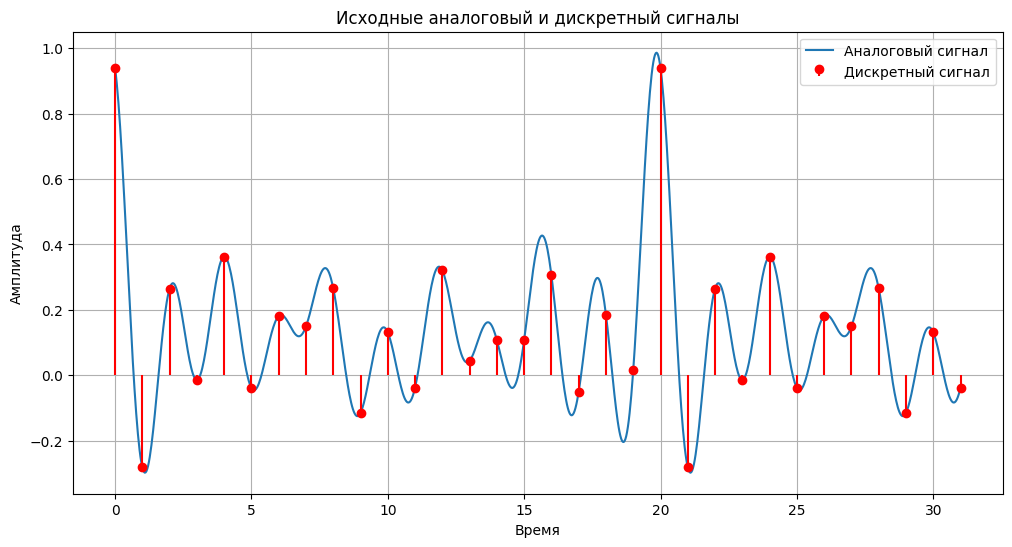

In [158]:
# График аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(t_analog, analog_signal, label='Аналоговый сигнал')
plt.stem(t, signal, 'r.', label='Дискретный сигнал', basefmt=" ")
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Исходные аналоговый и дискретный сигналы')
plt.legend()
plt.show()


### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


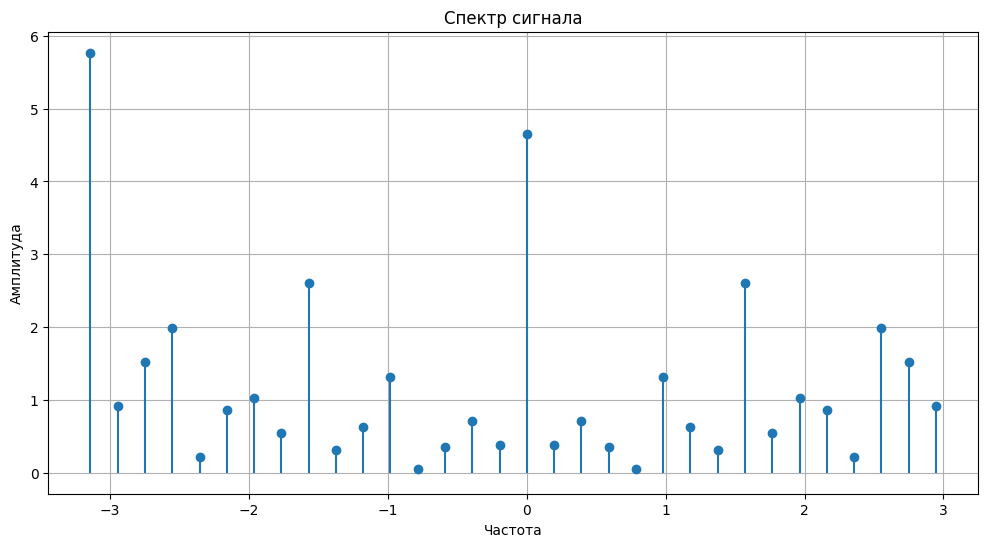

In [159]:
# Преобразование Фурье
frequencies = np.fft.fftfreq(N + 1, d=T) * 2 * math.pi
spectrum = np.fft.fft(signal)

# График спектра исходного сигнала
plt.figure(figsize=(12, 6))

plt.stem(frequencies, np.abs(spectrum), basefmt=" ")
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формулы передаточной функции для линейного сглаживания по 5-ти и 9-ти точек.

$$ \tilde{H}_{5}(f) =  \frac{1}{5}  \frac{\sin(5 \pi f)}{\sin(\pi f)}$$

$$ \tilde{H}_{9}(f) =  \frac{1}{9}  \frac{\sin(9 \pi f)}{\sin(\pi f)}$$

In [160]:
def smooth_linear(s, n):
    h = (n - 1) // 2
    result = np.zeros_like(s)
    for i in range(len(s)):
        acc = 0
        for j in range(-h, h+1):
            acc += s[(i + j) % len(s)]
        result[i] = acc / n
    return result

In [161]:
smoother_linear_by_5_points = smooth_linear(signal, 5)
smoother_linear_by_9_points = smooth_linear(signal, 9)

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


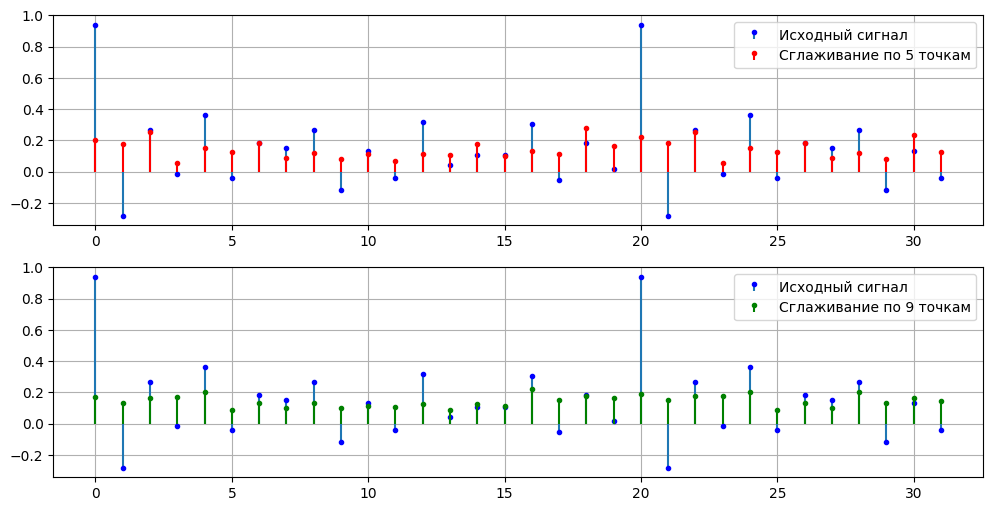

In [162]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(t, signal,  label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(t, smoother_linear_by_5_points, 'r', label='Сглаживание по 5 точкам', markerfmt='r.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t, signal,  label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(t, smoother_linear_by_9_points, 'g', label='Сглаживание по 9 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


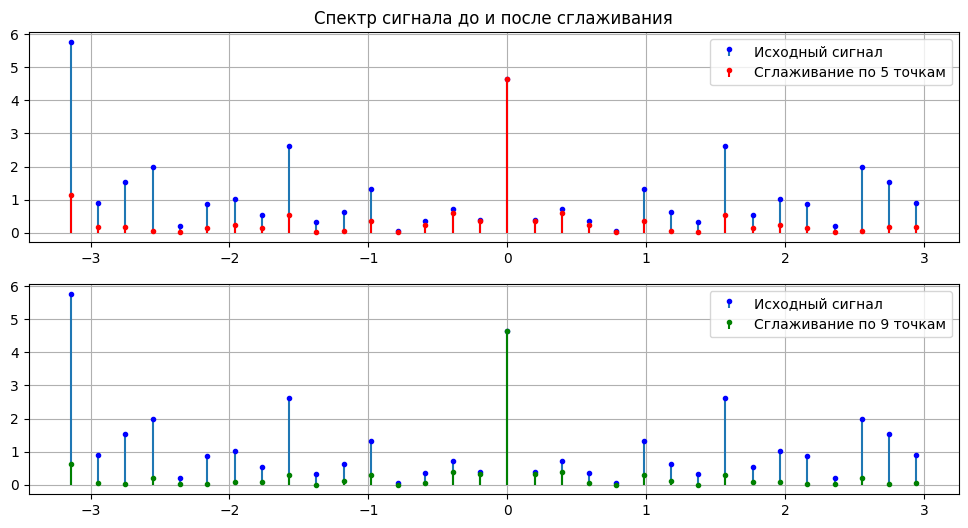

In [163]:
smoother_linear_by_5_points_spectrum = np.fft.fft(smoother_linear_by_5_points)
smoother_linear_by_9_points_spectrum = np.fft.fft(smoother_linear_by_9_points)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_linear_by_5_points_spectrum), 'r', label='Сглаживание по 5 точкам', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после сглаживания")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(smoother_linear_by_9_points_spectrum), 'g', label='Сглаживание по 9 точкам', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Так как полученный после фильтра можно выразить через $H(\omega)$, как

$$
Y(\omega) = H(\omega) \cdot X(\omega)
$$

Выразим отсюда передаточную функцию $H(\omega)$, как отношение $Y(\omega)$ к $X(\omega)$, и сравним её значение с теоретическим для каждого из фильтров:



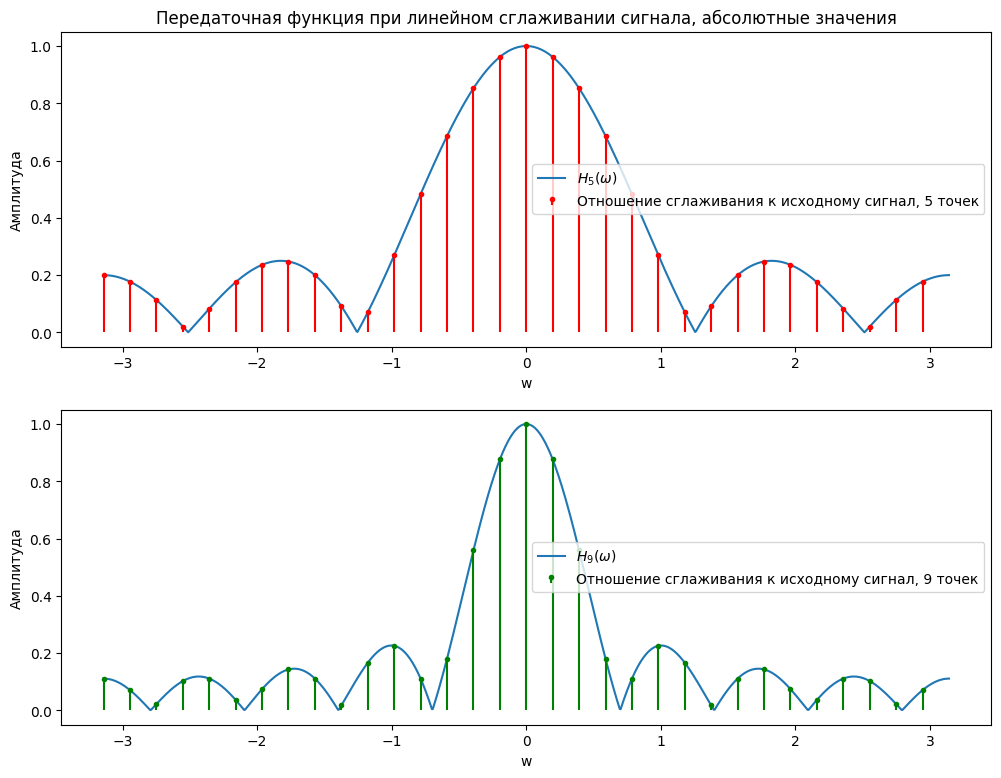

In [164]:
def H_1(w, n):
    h = (n - 1) // 2
    f = w / 2 / math.pi
    return np.divide(
        1 / (2 * h + 1) * np.sin(2 * math.pi * f * (h + 1 / 2)),
        np.sin(math.pi * f),
        out=np.ones_like(f),
        where=np.sin(math.pi * f) != 0,
    )


w = np.linspace(-math.pi, math.pi, 1000)

H_linear_5 = H_1(w, 5)
H_linear_9 = H_1(w, 9)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_linear_5), label="$ H_5(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_linear_by_5_points_spectrum / spectrum),
    'r',
    label='Отношение сглаживания к исходному сигнал, 5 точек',
    markerfmt='r.',
    basefmt=" ",
)
plt.title(
    'Передаточная функция при линейном сглаживании сигнала, абсолютные значения'
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(H_linear_9), label="$ H_9(\\omega) $")
plt.stem(
    frequencies,
    np.abs(smoother_linear_by_9_points_spectrum / spectrum),
    'g',
    label='Отношение сглаживания к исходному сигнал, 9 точек',
    markerfmt='g.',
    basefmt=" ",
)
plt.ylabel('Амплитуда')
plt.xlabel('w')
plt.legend()


plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()
plt.show()

Как видно из полученных графиков фильтр ведёт себя в точности как описывает теория, а именно: низкочастотные характеристики остаются без изменений, а высокочастотные части спектра сигнала уменьшаются.

### Задание 8

Повторить п. 4–7 для следующих фильтров:
1) Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
2) Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

#### а) Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.




Для дискретного сигнала применить дискретный фильтр, соответствующий численному дифференцированию 1-го порядка. Представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

$H(\omega) = \cfrac{e^{i\omega} - e^{-i\omega}}{2} = i\sin(\omega)$

In [165]:
def numerical_diff_filter(signal):
    return 0.5 * (np.roll(signal, -1) - np.roll(signal, 1))


Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

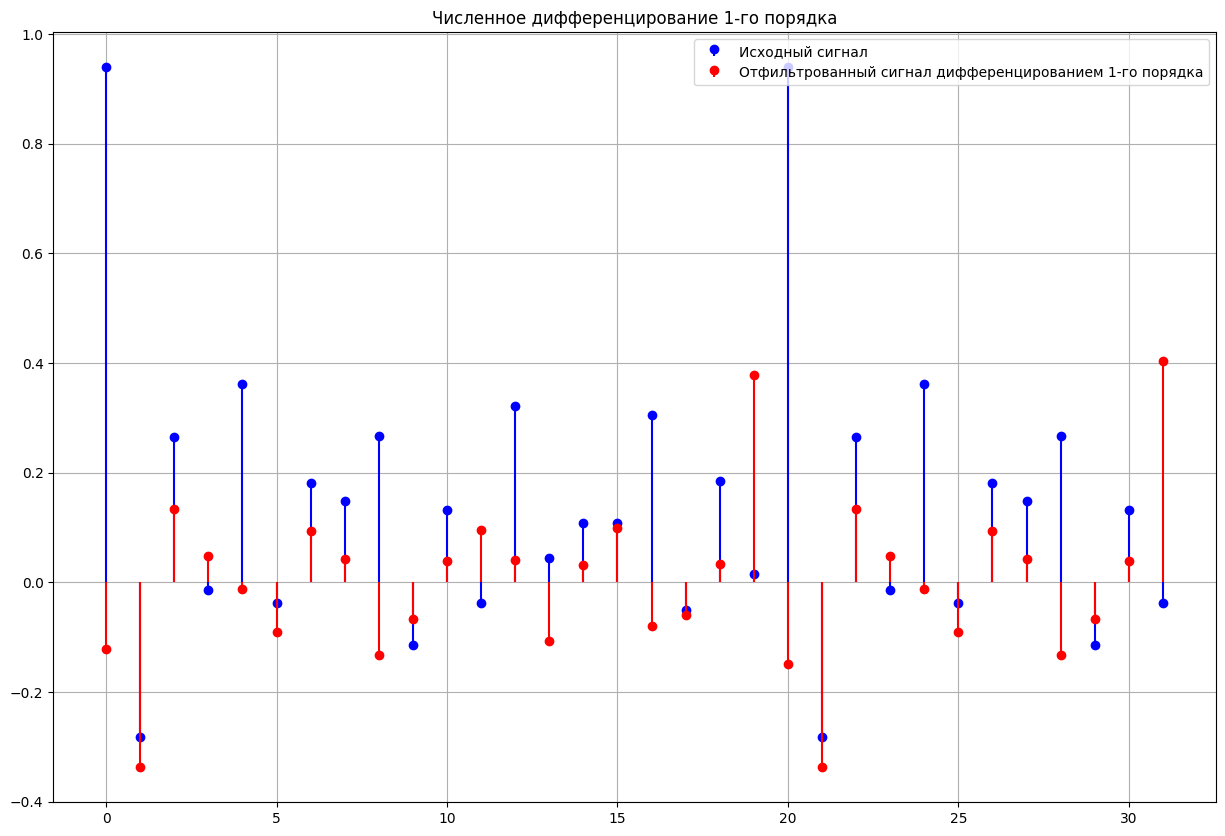

In [166]:
signal_diff = numerical_diff_filter(signal)

plt.figure(figsize=(15, 10))

plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_diff, 'r', label='Отфильтрованный сигнал дифференцированием 1-го порядка', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.title('Численное дифференцирование 1-го порядка')
plt.legend()

plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

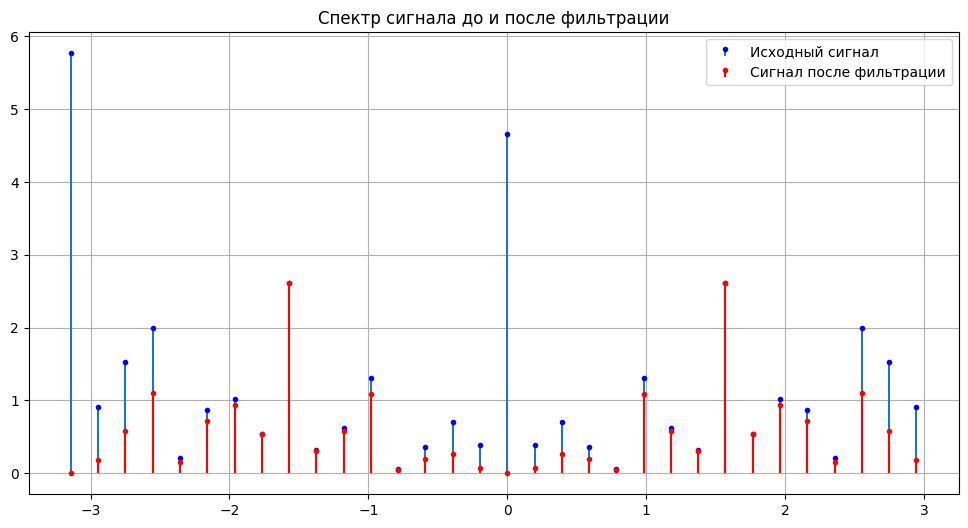

In [167]:
# Получение спектра с помощью ДПФ
signal_diff_spectrum = np.fft.fft(signal_diff)

# Построение графика спектра
plt.figure(figsize=(12, 6))


plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(signal_diff_spectrum), 'r', label='Сигнал после фильтрации', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после фильтрации")
plt.grid(True)
plt.legend()
plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


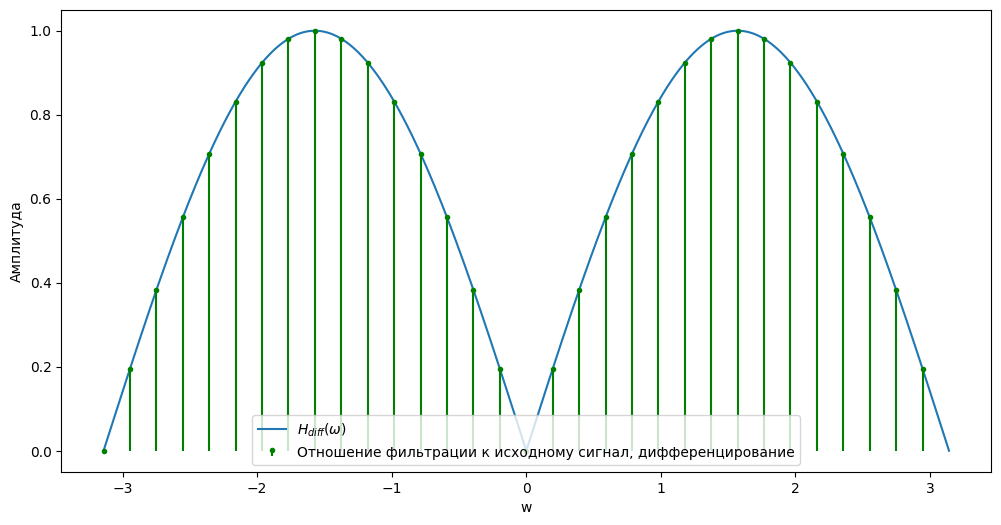

In [168]:
def H_diff(w):
    y =  np.sin(w)
    return y


w = np.linspace(-math.pi, math.pi, 1000)

H_diff_values = H_diff(w)

plt.figure(figsize=(12, 6))


plt.plot(w, np.abs(H_diff_values), label="$ H_{diff}(\\omega) $")
plt.stem(
    frequencies,
    np.abs(signal_diff_spectrum / spectrum),
    'g',
    label='Отношение фильтрации к исходному сигнал, дифференцирование',
    markerfmt='g.',
    basefmt=" ",
)
plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()
plt.show()

Полученные графики показывают, что ДПФ точно подтверждает частотную характеристику фильтра численного дифференцирования первого порядка. Эксперимент полностью совпадает с теоретической передаточной функцией $H(\omega) = i\sin(\omega)$.

Фильтр корректно передает низкие частоты, где $\sin(\omega) \approx \omega$, поэтому работает как идеальный дифференциатор в этой области. На высоких частотах амплитуда падает, что отражает естественные ограничения центральной разности и повышенную чувствительность к шуму.

#### б) Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


Передаточная функция для формулы прямоугольника

$H(\omega) = \cfrac{1}{2i\sin(\omega/2)}$

Передаточная функция для формулы трапеции

$H(\omega) = \cfrac{\cos(\frac{\omega}{2})}{2i\sin(\frac{\omega}{2})}$

Передаточная функция для формулы Симпсона

$H(\omega) = \cfrac{2 + \cos(\omega)}{3i\sin(\omega)}$

In [ ]:
import numpy as np

def integrate_rectangle(signal, analog_signal):
    N = len(signal) - 1          # дискретных шагов N, точек N+1
    M = len(analog_signal)
    integrated = np.zeros_like(signal, dtype=float)

    integrated[0] = 0.0

    for n in range(N):
        # индекс средней точки между t_n и t_{n+1} на сетке t_analog
        j = int(round((n + 0.5) * (M - 1) / N))
        integrated[n + 1] = integrated[n] + analog_signal[j] * T

    return integrated


def integrate_trapezoid(signal):
    # y_n+1 = y_n + 0.5 * (s_n + s_n+1)
    N = len(signal)
    integrated = np.zeros(N)

    # Начальное значение интеграла
    integrated[0] = 0

    for n in range(N-1):
        integrated[n+1] = integrated[n] + 0.5 * (signal[n] + signal[n+1])

    return integrated

def integrate_simpson(signal):
    N = len(signal)
    integrated = np.zeros_like(signal, dtype=float)
    integrated[0] = 0.0

    # считаем только чётные точки по кумулятивной формуле Симпсона
    for k in range(2, N, 2):
        f0 = signal[k - 2]
        f1 = signal[k - 1]
        f2 = signal[k]
        integrated[k] = integrated[k - 2] + (T / 3.0) * (f0 + 4.0 * f1 + f2)

    # нечётные точки заполняем линейной интерполяцией
    for k in range(1, N - 1, 2):
        integrated[k] = 0.5 * (integrated[k - 1] + integrated[k + 1])

    return integrated


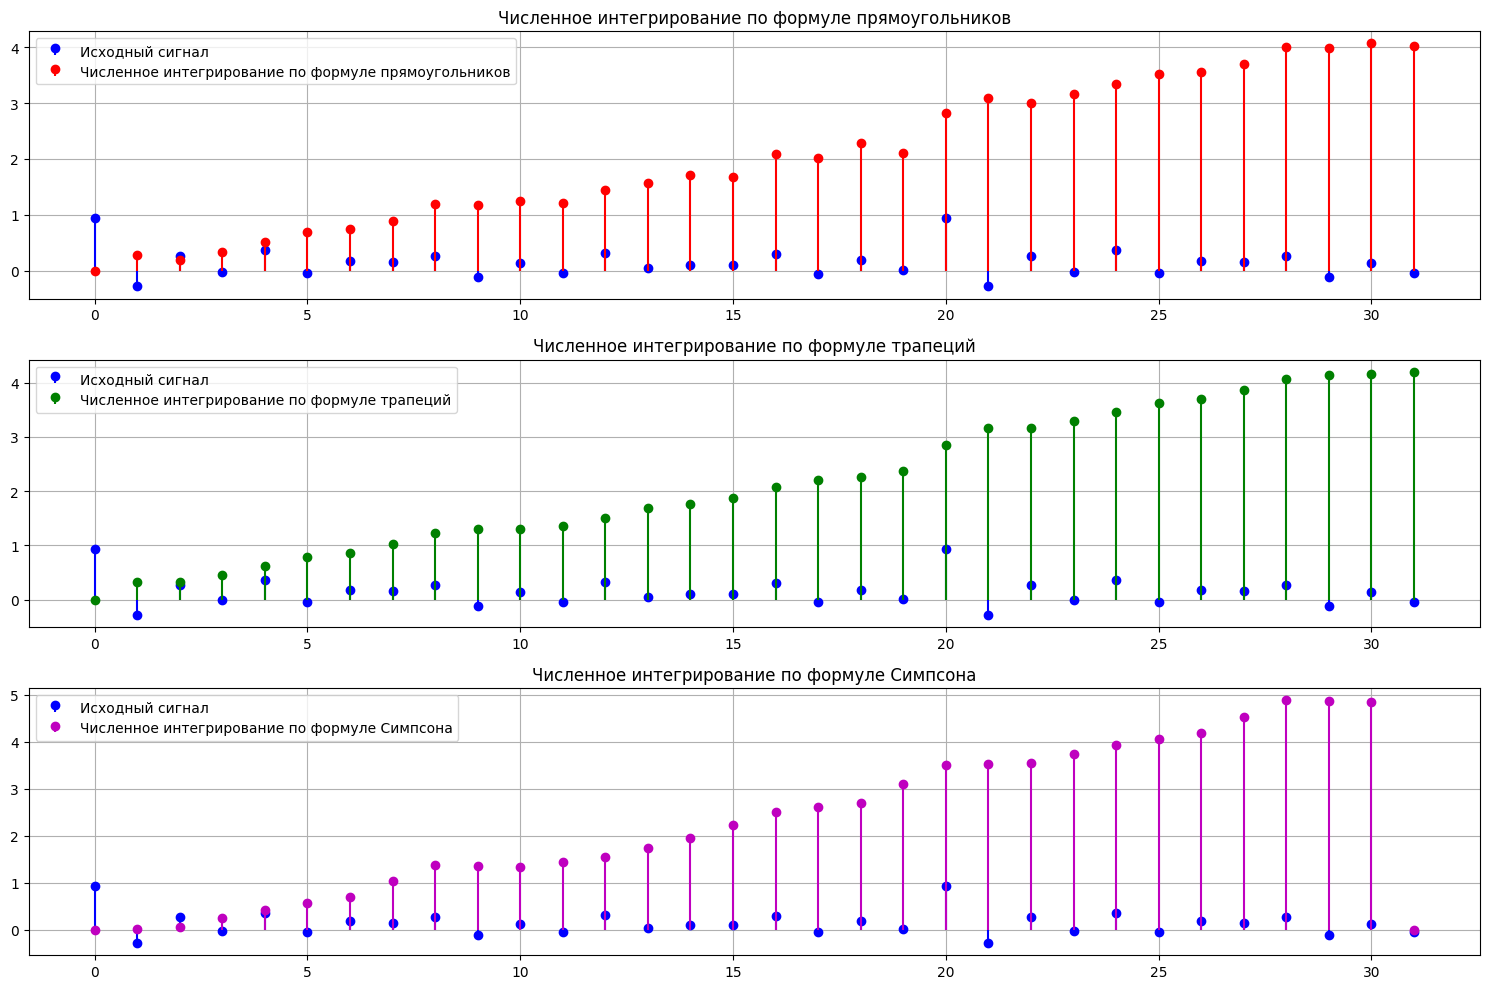

In [189]:
# Применяем сглаживание
signal_integrate_rectangle = integrate_rectangle(signal, analog_signal)
signal_integrate_trapezoid = integrate_trapezoid(signal)
signal_integrate_simpson = integrate_simpson(signal)

# Временная область
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_rectangle, 'r', label='Численное интегрирование по формуле прямоугольников', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле прямоугольников')

plt.subplot(3, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_trapezoid, 'g', label='Численное интегрирование по формуле трапеций', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле трапеций')

plt.subplot(3, 1, 3)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_simpson, 'm', label='Численное интегрирование по формуле Симпсона', markerfmt='mo', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле Симпсона')

plt.tight_layout()
plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

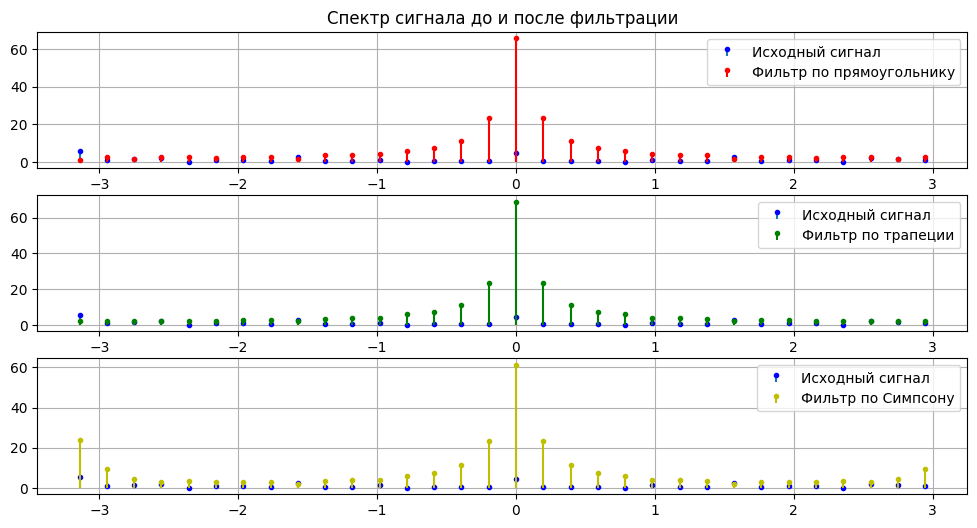

In [184]:
# Получение спектра с помощью ДПФ
spectrum_integrate_rectangle = np.fft.fft(signal_integrate_rectangle)
spectrum_integrate_trapezoid = np.fft.fft(signal_integrate_trapezoid)
spectrum_integrate_simpson = np.fft.fft(signal_integrate_simpson)

# Построение графика спектра
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)

plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(spectrum_integrate_rectangle), 'r', label='Фильтр по прямоугольнику', markerfmt='r.', basefmt=" ")
plt.title("Спектр сигнала до и после фильтрации")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(spectrum_integrate_trapezoid), 'g', label='Фильтр по трапеции', markerfmt='g.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.stem(frequencies, np.abs(spectrum), label='Исходный сигнал', markerfmt='b.', basefmt=" ")
plt.stem(frequencies, np.abs(spectrum_integrate_simpson), 'y', label='Фильтр по Симпсону', markerfmt='y.', basefmt=" ")
plt.grid(True)
plt.legend()

plt.show()
plt.show()



Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


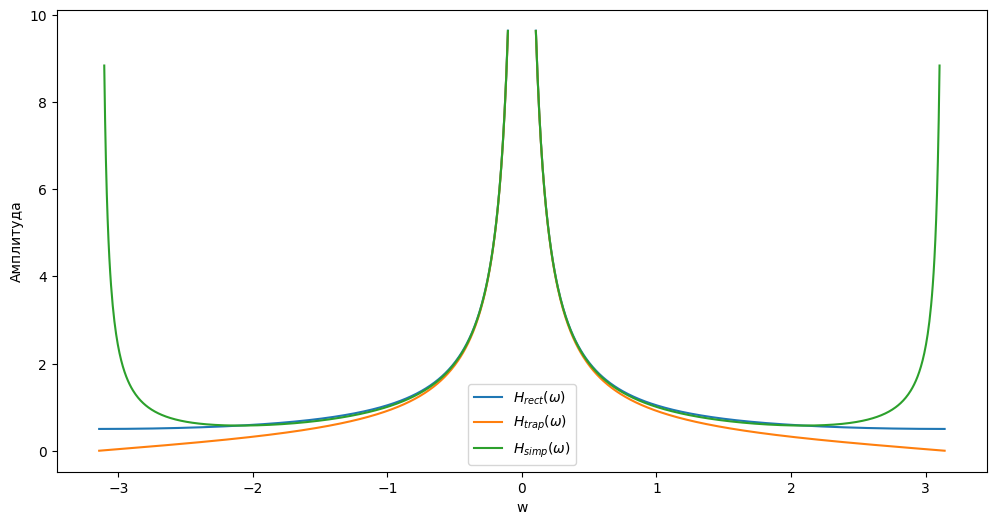

In [ ]:
w = np.linspace(-math.pi, math.pi, 1000)

H_rect = 1 / (2j * np.sin(w / 2))

H_trap = np.cos(w / 2) / (2j * np.sin(w / 2)) 

H_simp = (2 + np.cos(w)) / (3j * np.sin(w))

imag_rect = H_rect.imag
imag_trap = H_trap.imag
imag_simp = H_simp.imag

imag_rect[abs(imag_rect) > 10] = np.nan
imag_trap[abs(imag_trap) > 10] = np.nan
imag_simp[abs(imag_simp) > 10] = np.nan

plt.figure(figsize=(12, 6))

plt.plot(w, np.abs(imag_rect), label="$ H_{rect}(\\omega) $")
plt.plot(w, np.abs(imag_trap), label="$ H_{trap}(\\omega) $")
plt.plot(w, np.abs(imag_simp), label="$ H_{simp}(\\omega) $")

plt.ylabel('Амплитуда')
plt.xlabel('w')

plt.legend()

plt.show()

По графикам спектров и передаточных функций видно, что методы прямоугольников и трапеций усиливают низкие частоты и подавляют средние и высокие. Метод Симпсона ведёт себя иначе. Он усиливает как низкие, так и высокие частоты и ослабляет средние. Эти особенности полностью объясняют изменение амплитудного спектра после фильтрации и согласуются с полученными ранее результатами.

## Выводы

В ходе работы был создан дискретный сигнал и рассчитан его спектр с помощью ДПФ. Были применены фильтры, основанные на численном дифференцировании и интегрировании, а также фильтры сглаживания. Для каждого метода получены спектры после фильтрации и построены графики. Результаты сравнили с теоретическими передаточными функциями из предыдущих работ. Практическая часть полностью подтвердила теорию.

Анализ показал, что сглаживающие фильтры подавляют средние и высокие частоты. Фильтр дифференцирования снижает уровень низких частот. Интегрирующие фильтры усиливают низкие частоты и подавляют быстрые колебания, а метод Симпсона также усиливает высокие частоты. Все наблюдения соответствуют поведению передаточных функций.

<!-- Ура, фсё! -->
